In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [57]:
# 데이터 불러오기
df1  = pd.read_csv("light_train.csv")
df2 = pd.read_csv("building_info.csv")
df1 = df1.copy()
df2 = df2.copy()
df1.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88


In [58]:
df2.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [59]:
#두 데이터 합치기
df=pd.merge(df1,df2,on='건물번호')

In [60]:
df.head()#-값을 nan으로 바꿔줌
# 모든 컬럼에서 값이 3인 경우 NaN으로 변경
df = df.applymap(lambda x: np.nan if x == '-' else x)

In [61]:
df.info() #강수량 일조 일사 태양광용량 ESS저장용량 PCS용량 열을 삭제

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
 10  건물유형           204000 non-null  object 
 11  연면적(m2)        204000 non-null  float64
 12  냉방면적(m2)       204000 non-null  float64
 13  태양광용량(kW)      73440 non-null   object 
 14  ESS저장용량(kWh)   10200 non-null   object 
 15  PCS용량(kW)      10200 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 24.9+ MB


In [62]:
df=df.drop(columns=['강수량(mm)','일조(hr)','일사(MJ/m2)','태양광용량(kW)','ESS저장용량(kWh)','PCS용량(kW)'])

In [63]:
df.info() #풍속과 습도에 미묘한 nan존재하니 제거
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   풍속(m/s)        203981 non-null  float64
 5   습도(%)          203991 non-null  float64
 6   전력소비량(kWh)     204000 non-null  float64
 7   건물유형           204000 non-null  object 
 8   연면적(m2)        204000 non-null  float64
 9   냉방면적(m2)       204000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 15.6+ MB


In [64]:
df.info() 
#1.건물번호는 index와 똑같으니 제거하기
#2.num_date_time도 일시와 똑같으니 제거하기
#3.일시는 datetime으로 해서 가져오기
#4.건물유형은 one-hot encoding하기

<class 'pandas.core.frame.DataFrame'>
Index: 203981 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  203981 non-null  object 
 1   건물번호           203981 non-null  int64  
 2   일시             203981 non-null  object 
 3   기온(C)          203981 non-null  float64
 4   풍속(m/s)        203981 non-null  float64
 5   습도(%)          203981 non-null  float64
 6   전력소비량(kWh)     203981 non-null  float64
 7   건물유형           203981 non-null  object 
 8   연면적(m2)        203981 non-null  float64
 9   냉방면적(m2)       203981 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 17.1+ MB


In [65]:
df.describe()

,건물번호,기온(C),풍속(m/s),습도(%),전력소비량(kWh),연면적(m2),냉방면적(m2)
count,203981.000000,203981.000000,203981.000000,203981.000000,203981.000000,2.039810e+05,2.039810e+05
mean,50.498787,25.543328,2.134031,78.716354,2451.062288,2.609000e+05,1.864146e+05
std,28.865541,3.779281,1.358109,15.080294,2440.727607,1.273608e+06,1.085223e+06
min,1.000000,10.100000,0.000000,13.000000,0.000000,5.578400e+03,0.000000e+00
25%,25.000000,23.400000,1.200000,69.000000,1085.760000,6.137547e+04,2.039700e+04
50%,50.000000,25.700000,2.000000,81.000000,1766.340000,9.331400e+04,5.606000e+04
75%,75.000000,28.100000,2.800000,91.000000,2970.000000,1.877370e+05,9.960387e+04
max,100.000000,37.100000,13.300000,100.000000,25488.400000,1.287288e+07,1.094194e+07


In [66]:
df=df.drop(columns=['num_date_time','건물번호'])

In [68]:
# 월, 일, 시간 추출 함수 정의
def extract_date_time(date_string):
    month = date_string[4:6]
    day = date_string[6:8]
    hour = date_string[9:11]
    return month, day, hour

# 데이터프레임에 새로운 열 추가
df[['월', '일', '시간']] = df['일시'].apply(lambda x: pd.Series(extract_date_time(x)))


In [69]:
#일시열 없애기
df=df.drop(columns=['일시'])
df.head()

,기온(C),풍속(m/s),습도(%),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),월,일,시간
0,18.6,0.9,42.0,1085.28,건물기타,110634.0,39570.0,06,01,00
1,18.0,1.1,45.0,1047.36,건물기타,110634.0,39570.0,06,01,01
2,17.7,1.5,45.0,974.88,건물기타,110634.0,39570.0,06,01,02
3,16.7,1.4,48.0,953.76,건물기타,110634.0,39570.0,06,01,03
4,18.4,2.8,43.0,986.40,건물기타,110634.0,39570.0,06,01,04


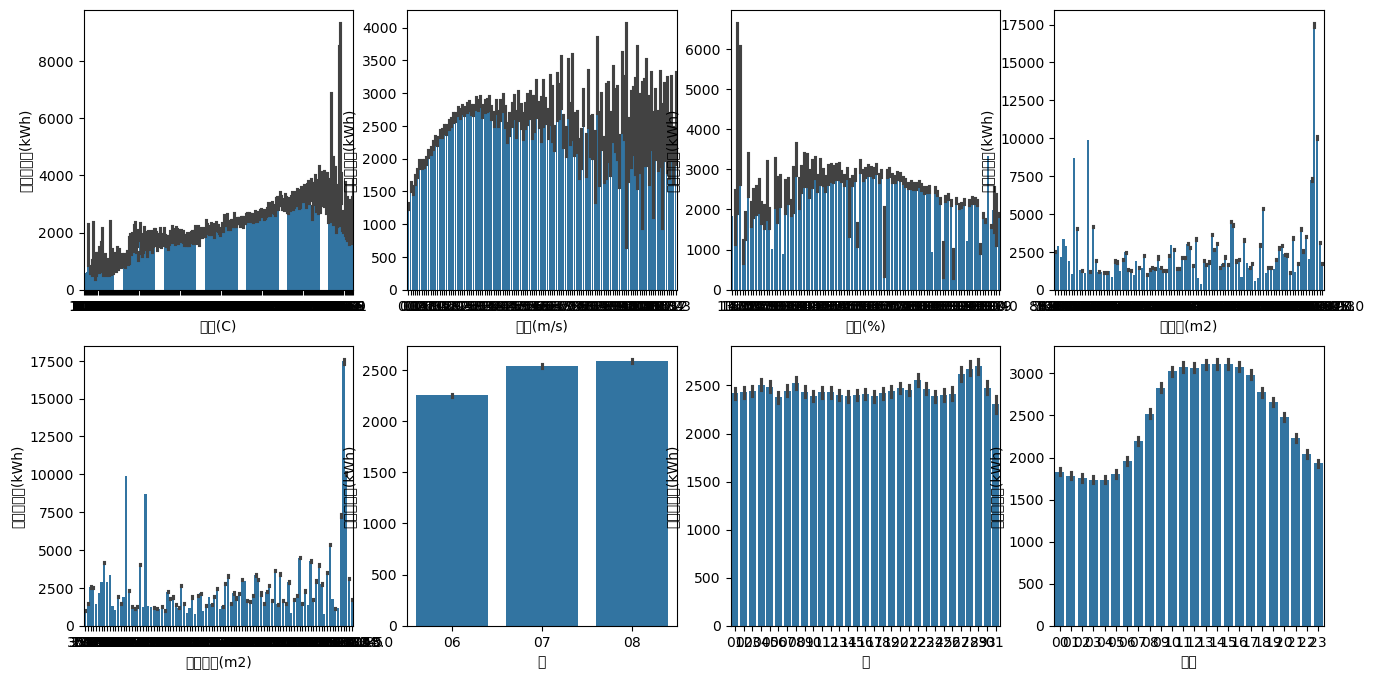

In [70]:
#막대그래프
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
feature= ['기온(C)','풍속(m/s)','습도(%)','연면적(m2)','냉방면적(m2)','월','일','시간']
 
for i, feature in enumerate(feature):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature, y='전력소비량(kWh)', data=df, ax=axs[row][col])

<Axes: xlabel='시간', ylabel='전력소비량(kWh)'>

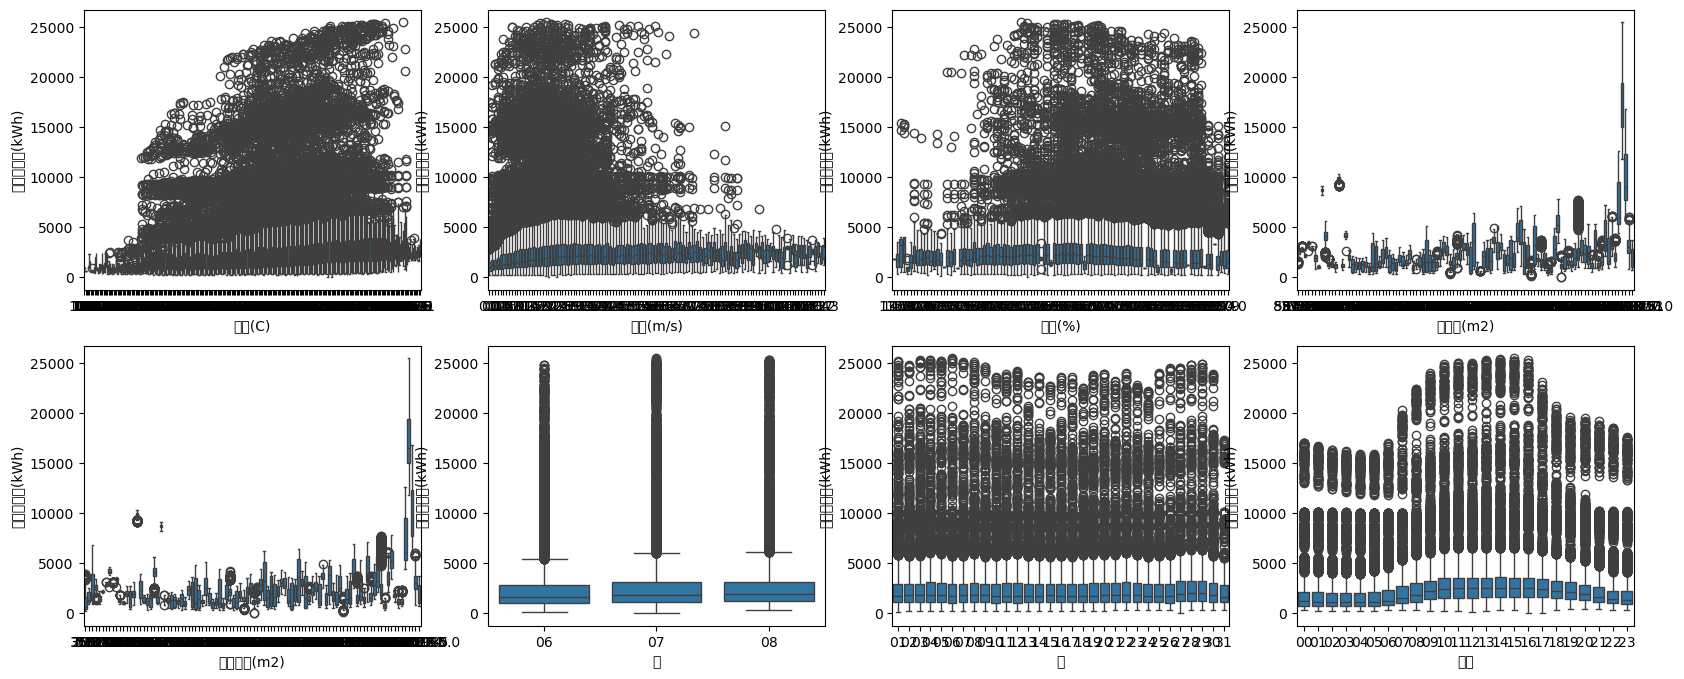

In [72]:
# 박스플롯(시즌, 근무일, 날씨, 시간)
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(20,8)
 
sns.boxplot(data=df, x='기온(C)', y='전력소비량(kWh)', ax=axes[0][0])
sns.boxplot(data=df, x='풍속(m/s)', y='전력소비량(kWh)', ax=axes[0][1])
sns.boxplot(data=df, x = '습도(%)',  y='전력소비량(kWh)', ax=axes[0][2])
sns.boxplot(data=df, x='연면적(m2)', y='전력소비량(kWh)', ax=axes[0][3])
sns.boxplot(data=df, x='냉방면적(m2)', y='전력소비량(kWh)', ax=axes[1][0])
sns.boxplot(data=df, x='월', y='전력소비량(kWh)', ax=axes[1][1])
sns.boxplot(data=df, x = '일', y='전력소비량(kWh)', ax=axes[1][2])
sns.boxplot(data=df, x='시간', y='전력소비량(kWh)', ax=axes[1][3])

In [86]:
# 성능평가함수 정의

from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))


def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print(f'{model.__class__.__name__} 로그 변환된 RMSE: {np.round(rmse, 4)}')

    return rmse

def get_rmses(models):
    rmses = []

    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)

    return rmses

In [87]:
#원핫인코딩
df= pd.get_dummies(df)


In [88]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_features = df.drop('전력소비량(kWh)',axis=1, inplace=False)
y_target = df['전력소비량(kWh)']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 모델 적용하기
lr_reg = LinearRegression()# TODO: YOUR_CODE_HERE
ridge_reg = Ridge()# TODO: YOUR_CODE_HERE
lasso_reg = Lasso()# TODO: YOUR_CODE_HERE

lr_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 예측 평가
models = [lr_reg, ridge_reg, lasso_reg]
rmses = get_rmses(models)

LinearRegression 로그 변환된 RMSE: 1981.2772
Ridge 로그 변환된 RMSE: 1981.2766
Lasso 로그 변환된 RMSE: 1981.9975


In [91]:
# 상위, 하위 10개 coefficients 추출
def get_top_bottom_coef(model):
    # coef series
    coef = pd.Series(model.coef_, index = X_features.columns)

    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

# 회귀 계수 시각화
def visualize_coefficient(models, xlim=None):
    fig, axs = plt.subplots(3,1, figsize=(24,20))
    fig.tight_layout()

    for i, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low], axis=0 )

        axs[i].set_title(model.__class__.__name__ , size=25, x= 0.9, y= 0.1)

        # font size 조정
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)

        # x축 범위
        if xlim:
            axs[i].set_xlim(xlim)

        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i])

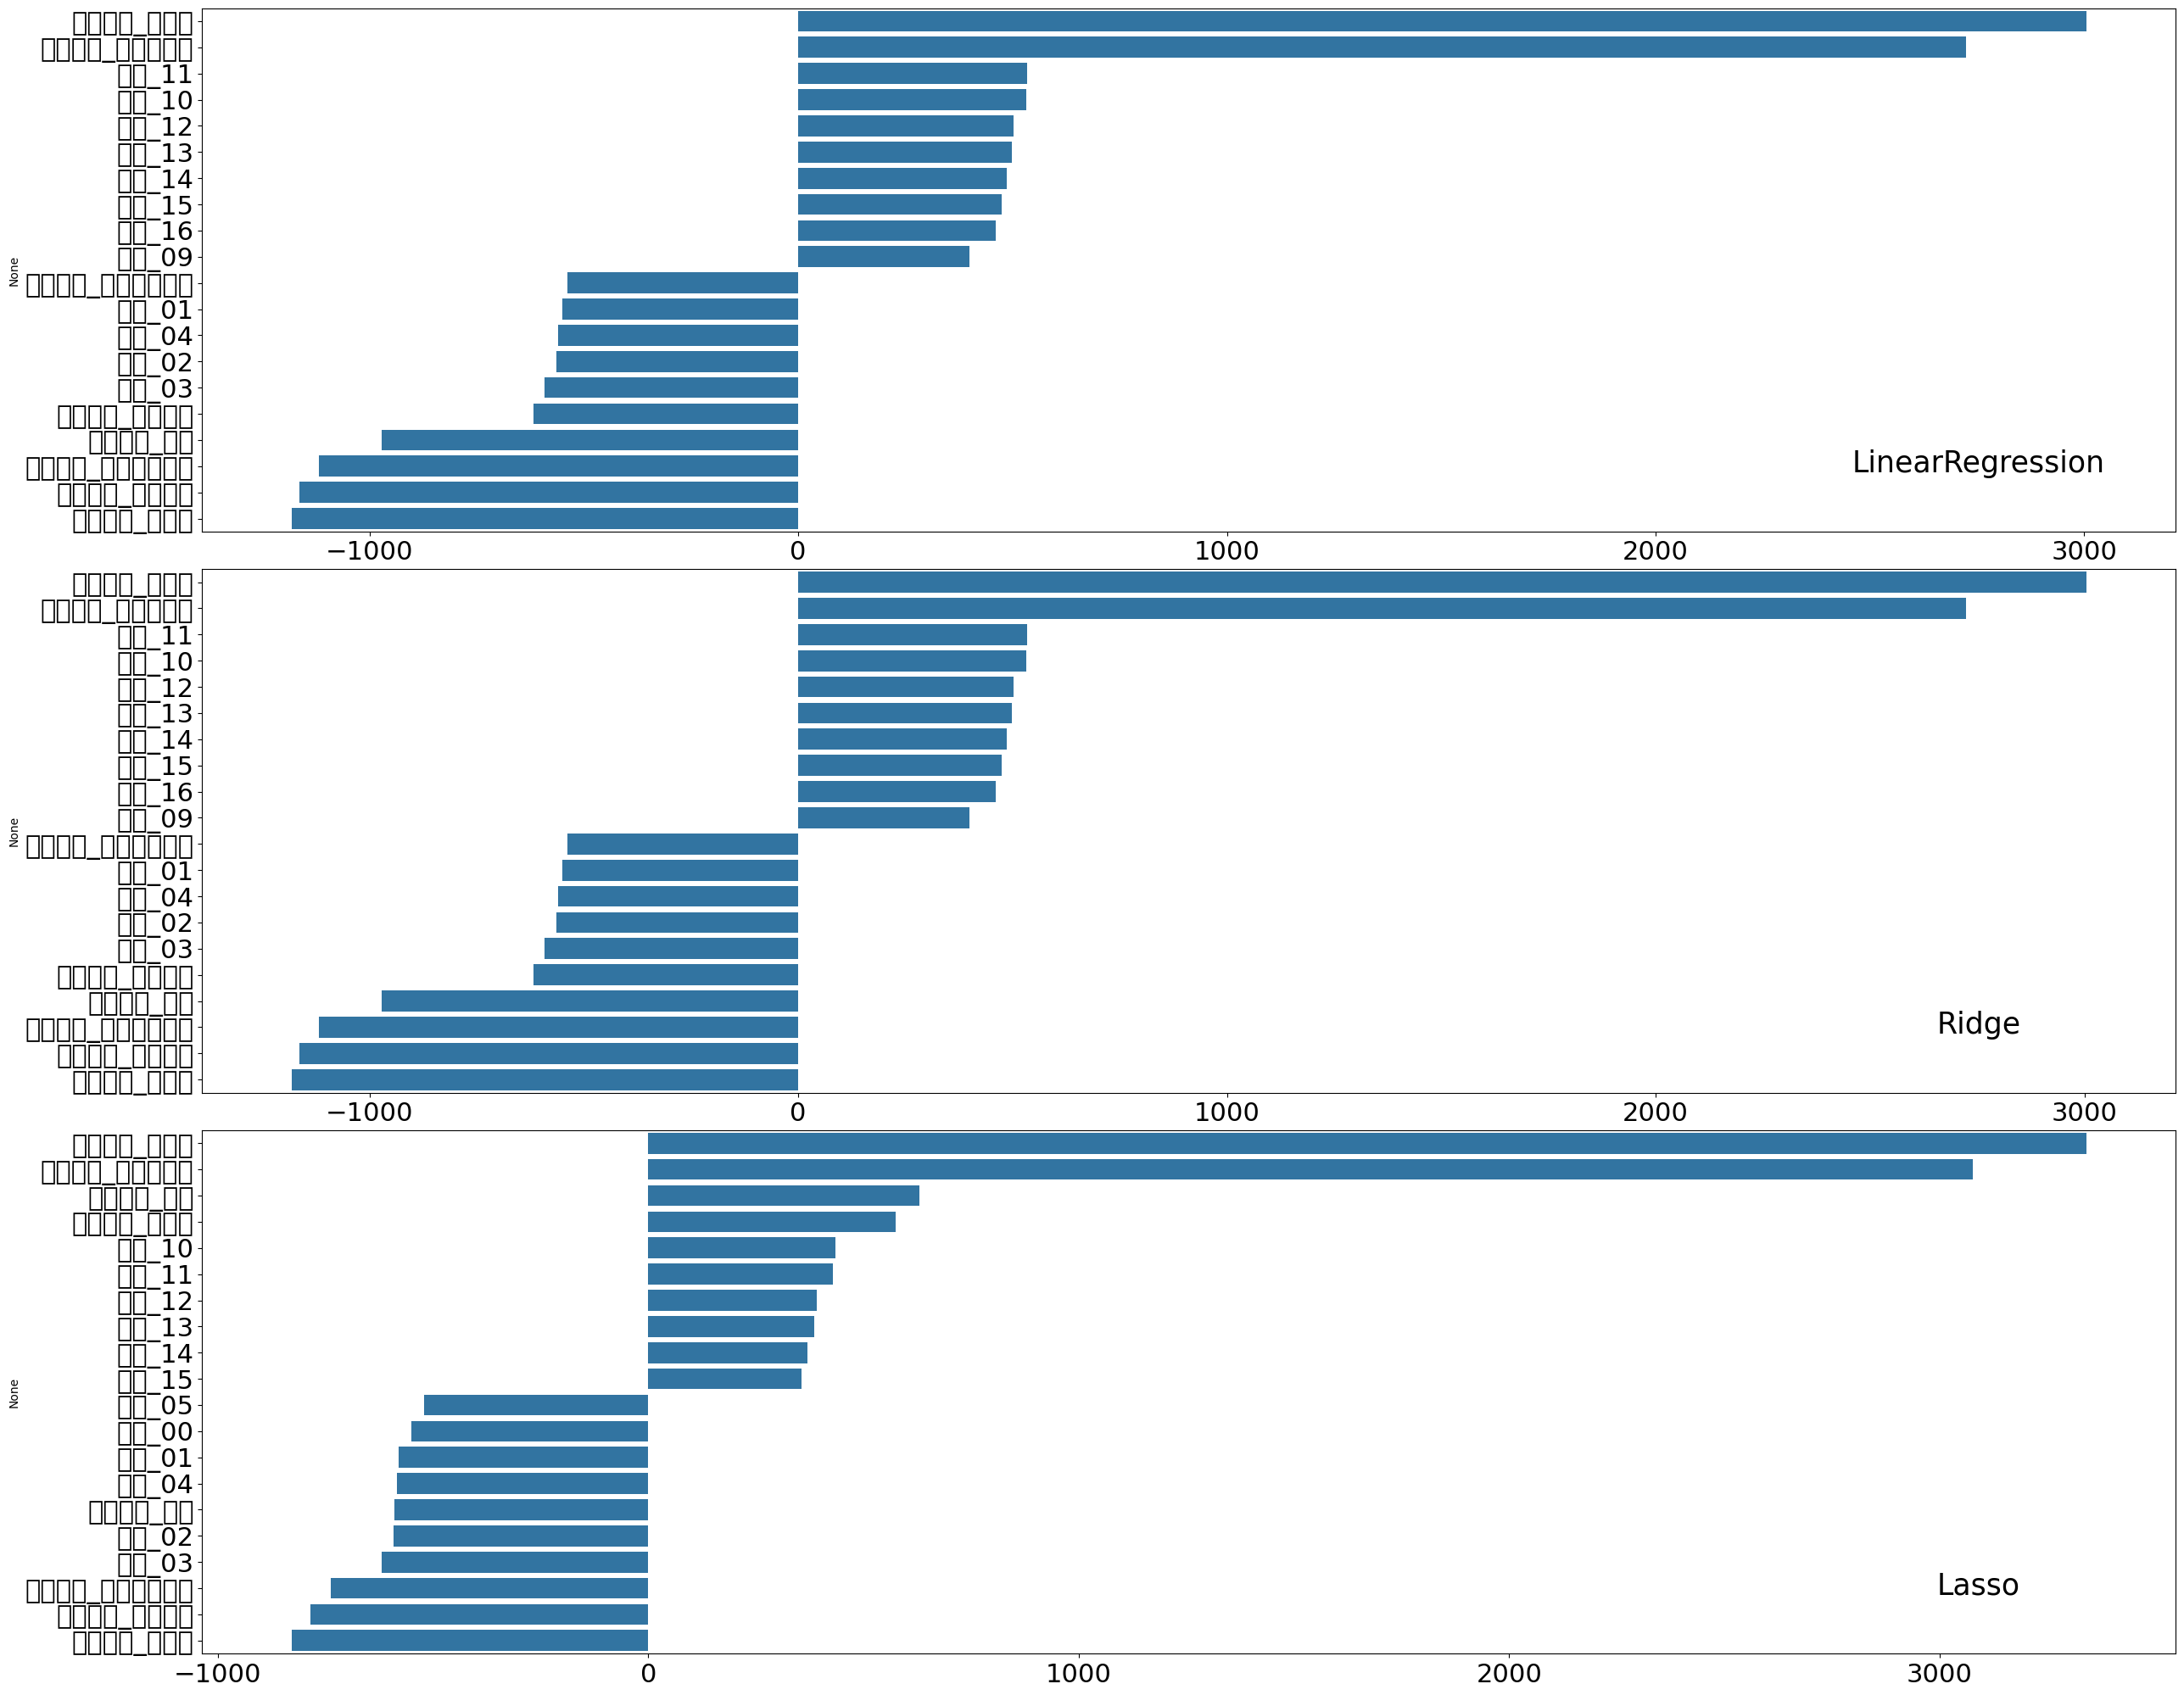

In [92]:
# LinearRegression, Ridge, Lasso
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [96]:
def get_best_params(model, params):
    model_name = model.__class__.__name__
    grid_cv = GridSearchCV(model, param_grid=params,
                           scoring='neg_mean_squared_error', cv=5)

    grid_cv.fit(X_features, y_target)
    best_rmse = np.sqrt(-1* grid_cv.best_score_)

    print(f'{model_name} GridSearchCV 최적 평균 RMSE: {np.round(best_rmse, 4)}, 최적 alpha:{grid_cv.best_params_}')

    return grid_cv.best_estimator_

In [95]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)

best_xgb = get_best_params(xgb_reg, xgb_params)

XGBRegressor GridSearchCV 최적 평균 RMSE: 2533.5962, 최적 alpha:{'n_estimators': 1000}


In [97]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

best_lgbm = get_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 163184, number of used features: 74
[LightGBM] [Info] Start training from score 2581.869422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 163185, number of used features: 73
[LightGBM] [Info] Start training from score 2009.208852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

In [99]:
def get_rmse_pred(preds):
    for key in preds.keys():
        prediction = preds[key]

        mse = mean_squared_error(y_test, prediction)
        rmse = np.sqrt(mse)

        print(f"{key} 모델 RMSE: {rmse:.4f}")

In [100]:
###이건 필요없는셀
ridge_reg = Ridge(alpha=8)
lasso_reg = Lasso(alpha=0.001)

ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 혼합 예측
fusion_pred = 0.4*ridge_pred + 0.6*lasso_pred

# 개별 예측, 혼합 예측 평가
preds = {
    "Ridge": ridge_pred,
    "Lasso": lasso_pred,
    "Fusion": fusion_pred
}

get_rmse_pred(preds)

Ridge 모델 RMSE: 1981.2728
Lasso 모델 RMSE: 1981.2147
Fusion 모델 RMSE: 1981.2057


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd

# 데이터 프레임, 시리즈 -> Numpy 배열 변환
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

# 개별 모델별 메타 데이터 생성 함수
def get_stacking_base_datasets(model, X_train, y_train, X_test, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)

    train_cnt = X_train.shape[0]
    test_cnt = X_test.shape[0]
    train_meta = np.zeros((train_cnt, 1))
    test_meta = np.zeros((test_cnt, n_folds))

    print(f'{model.__class__.__name__} model 시작')

    for i, (train_fold_idx, test_fold_idx) in enumerate(kf.split(X_train)):
        print(f'\t폴드 세트: {i+1} 시작')
        x_train_fold = X_train[train_fold_idx]
        y_train_fold = y_train[train_fold_idx]
        x_test_fold = X_train[test_fold_idx]

        model.fit(x_train_fold, y_train_fold)

        train_meta[test_fold_idx, :] = model.predict(x_test_fold).reshape(-1, 1)

        test_meta[:, i] = model.predict(X_test)

    test_meta_mean = np.mean(test_meta, axis=1).reshape(-1, 1)

    return train_meta, test_meta_mean

# 각 모델 학습
ridge_reg = Ridge(alpha=8)
lasso_reg = Lasso(alpha=0.001)
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6,
                         colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

# 각 모델 메타 데이터 생성
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train, y_train, X_test, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train, y_train, X_test, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train, y_train, X_test, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train, y_train, X_test, 5)

# 결과 확인
print(ridge_train.shape, ridge_test.shape)
print(lasso_train.shape, lasso_test.shape)
print(xgb_train.shape, xgb_test.shape)
print(lgbm_train.shape, lgbm_test.shape)


Ridge model 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
	폴드 세트: 5 시작
Lasso model 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
	폴드 세트: 5 시작
XGBRegressor model 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
	폴드 세트: 5 시작


In [ ]:
# 최종 메타 데이터 결합
final_X_train_meta = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
final_X_test_meta = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델 학습/예측/평가
meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(final_X_train_meta, y_train)
meta_predict = meta_model_lasso.predict(final_X_test_meta)
rmse = np.sqrt( mean_squared_error(y_test, meta_predict))

print(f"스태킹 회귀 모델 RMSE: {rmse:.4f}")